# Pyplot tutorial
(Quelle: https://github.com/github/codespaces-jupyter)
An introduction to the pyplot interface.

## Intro to pyplot

`matplotlib.pyplot` is a collection of functions that make matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

> **Note**
>
>the pyplot API is generally less-flexible than the object-oriented API. Most of the function calls you see here can also be called as methods from an Axes object. We recommend browsing the tutorials and examples to see how this works.
>

Generating visualizations with pyplot is very quick:

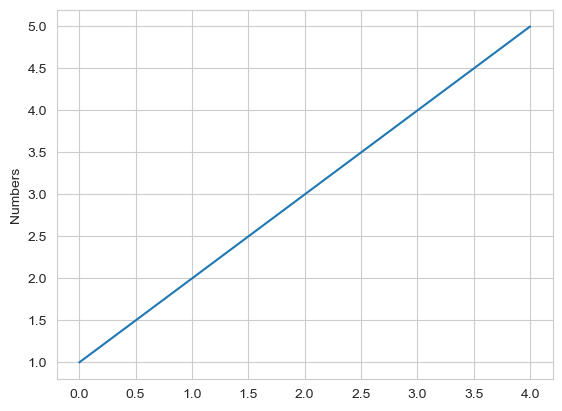

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5])
plt.ylabel('Numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to plot, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are `[0, 1, 2, 3]`.

`plot` is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can write:

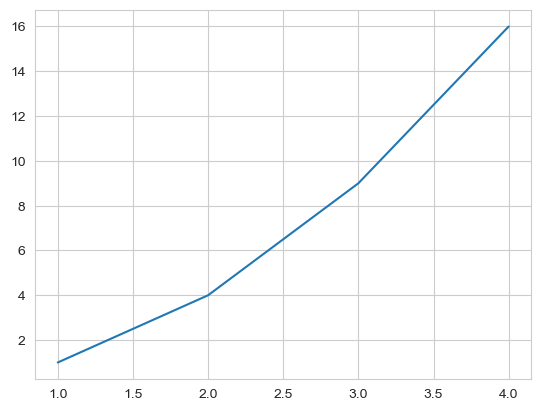

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

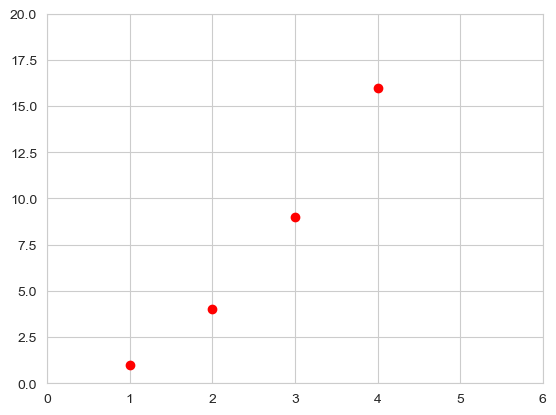

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

See the `plot` documentation for a complete list of line styles and format strings. The `axis` function in the example above takes a list of `[xmin, xmax, ymin, ymax]` and specifies the viewport of the axes.

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates plotting several lines with different format styles in one function call using arrays.

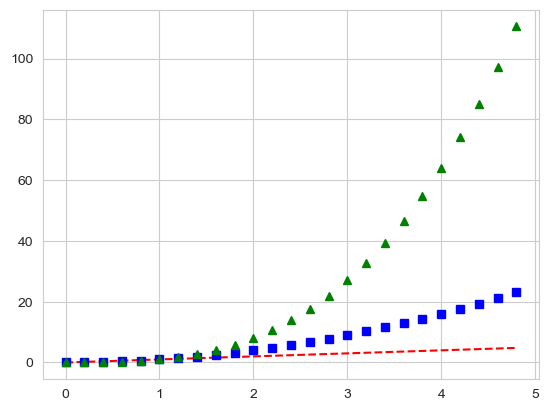

In [4]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with `numpy.recarray` or `pandas.DataFrame`.

Matplotlib allows you provide such an object with the `data` keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

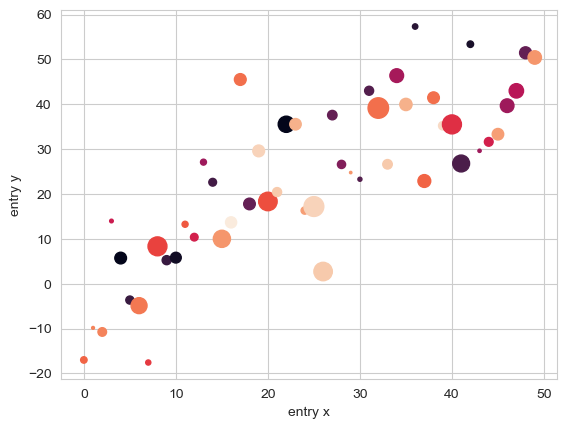

In [5]:
data = {'x': np.arange(50),
        'farbe': np.random.randint(0, 50, 50),
        'dm': np.random.randn(50)}
data['y'] = data['x'] + 10 * np.random.randn(50)
data['dm'] = np.abs(data['dm']) * 100

plt.scatter('x', 'y', c='farbe', s='dm', data=data)
plt.xlabel('entry x')
plt.ylabel('entry y')
plt.show()

In [6]:
data

{'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'farbe': array([31, 34, 34, 23,  0,  7, 33, 27, 28,  7,  2, 30, 24, 18,  8, 36, 46,
        32, 12, 43, 29, 42,  0, 39, 37, 43, 42, 12, 15, 36, 10, 10, 32, 42,
        19, 39,  5, 31, 32, 44, 26,  9,  3, 18, 24, 37, 18, 21, 12, 36]),
 'dm': array([ 21.55983341,   4.14860319,  38.20224348,   6.90983426,
         70.59939896,  34.03879542, 131.98683481,  13.70269823,
        185.34674461,  42.63251182,  60.12108329,  18.90087894,
         30.06247875,  18.39208555,  31.1159876 , 152.3047001 ,
         63.98673864,  71.59080072,  69.70657656,  71.53167791,
        177.38005209,  41.93121729, 135.91946636,  67.48554297,
         27.34362835, 203.16103641, 176.30167321,  46.15749468,
         34.81225651,   2.94847459,   8.57841916,  42.00124641,
        217.7829

## Plotting with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

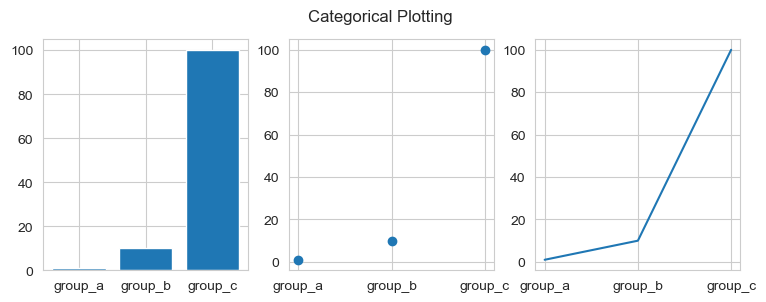

In [7]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()